In [26]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.applications.densenet import preprocess_input
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os


import pandas as pd
import numpy as np

seed = 7 # set same as for training

In [327]:
# Resources:
# https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras

In [2]:
np.random.seed(seed)  

In [12]:
test_data_dir = "/data/oxford102/val/"
batch_size = 128
nr_categories = 102


In [10]:
model = load_model("/data/oxford102/experiments/1549845691.8560944/densenet201_1549845691.8560944.h5")

In [6]:
input_processor = preprocess_input

In [7]:
train_val_datagen = ImageDataGenerator(preprocessing_function=input_processor)

In [8]:
predict_generator = train_val_datagen.flow_from_directory(
            test_data_dir,  # this is the target directory
            target_size=(img_width, img_height),  # all images will be resized to 250x250
            batch_size=128,
            class_mode=None,
            color_mode="rgb",
            shuffle=False,
            seed=seed)

Found 2441 images belonging to 102 classes.


In [13]:
predict_generator.reset()  # reset the predict_generator each time
probabilities = model.predict_generator(predict_generator, 2441/128, verbose=1)

20/19 [===============================] - 31s 2s/step


In [14]:
probabilities.shape

(2441, 102)

In [15]:
probabilities

array([[9.66245711e-01, 1.33186887e-07, 7.35159972e-07, ...,
        7.31853015e-06, 2.62090907e-05, 9.98339829e-07],
       [9.99977946e-01, 1.34325060e-11, 1.85547588e-09, ...,
        4.67980676e-09, 2.08144968e-09, 2.58107025e-09],
       [9.98534083e-01, 1.72307790e-09, 2.00837551e-08, ...,
        9.96980543e-06, 4.87826753e-07, 7.59803186e-07],
       ...,
       [9.81763515e-05, 2.55305295e-05, 2.95620353e-04, ...,
        1.81284025e-02, 3.48549485e-02, 7.87616766e-04],
       [6.63327373e-05, 2.08944679e-04, 1.02260434e-04, ...,
        1.41971177e-04, 2.62060598e-03, 2.56186795e-05],
       [1.25911130e-04, 6.71062708e-06, 5.10420978e-05, ...,
        1.34724614e-04, 2.45620267e-05, 4.44417028e-03]], dtype=float32)

In [ ]:
# get the class with the highest probability

In [16]:
predicted_class_indices=np.argmax(probabilities,axis=1)

In [17]:
predicted_class_indices

array([ 0,  0,  0, ..., 81, 87, 31])

In [18]:
probabilities.shape

(2441, 102)

In [20]:
probabilities[0][0]  # class probability

0.9662457

In [21]:
labels = (predict_generator.class_indices)

In [22]:
labels

{'alpine_sea_holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'ball_moss': 4,
 'balloon_flower': 5,
 'barbeton_daisy': 6,
 'bearded_iris': 7,
 'bee_balm': 8,
 'bird_of_paradise': 9,
 'bishop_of_llandaff': 10,
 'black-eyed_susan': 11,
 'blackberry_lily': 12,
 'blanket_flower': 13,
 'bolero_deep_blue': 14,
 'bougainvillea': 15,
 'bromelia': 16,
 'buttercup': 17,
 'californian_poppy': 18,
 'camellia': 19,
 'canna_lily': 20,
 'canterbury_bells': 21,
 'cape_flower': 22,
 'carnation': 23,
 'cautleya_spicata': 24,
 'clematis': 25,
 "colt's_foot": 26,
 'columbine': 27,
 'common_dandelion': 28,
 'corn_poppy': 29,
 'cyclamen_': 30,
 'daffodil': 31,
 'desert-rose': 32,
 'english_marigold': 33,
 'fire_lily': 34,
 'foxglove': 35,
 'frangipani': 36,
 'fritillary': 37,
 'garden_phlox': 38,
 'gaura': 39,
 'gazania': 40,
 'geranium': 41,
 'giant_white_arum_lily': 42,
 'globe-flower': 43,
 'globe_thistle': 44,
 'grape_hyacinth': 45,
 'great_masterwort': 46,
 'hard-leaved_pocket_orchid': 47,
 

In [23]:
_labels = dict((v,k) for k,v in labels.items())

In [24]:
_labels

{0: 'alpine_sea_holly',
 1: 'anthurium',
 2: 'artichoke',
 3: 'azalea',
 4: 'ball_moss',
 5: 'balloon_flower',
 6: 'barbeton_daisy',
 7: 'bearded_iris',
 8: 'bee_balm',
 9: 'bird_of_paradise',
 10: 'bishop_of_llandaff',
 11: 'black-eyed_susan',
 12: 'blackberry_lily',
 13: 'blanket_flower',
 14: 'bolero_deep_blue',
 15: 'bougainvillea',
 16: 'bromelia',
 17: 'buttercup',
 18: 'californian_poppy',
 19: 'camellia',
 20: 'canna_lily',
 21: 'canterbury_bells',
 22: 'cape_flower',
 23: 'carnation',
 24: 'cautleya_spicata',
 25: 'clematis',
 26: "colt's_foot",
 27: 'columbine',
 28: 'common_dandelion',
 29: 'corn_poppy',
 30: 'cyclamen_',
 31: 'daffodil',
 32: 'desert-rose',
 33: 'english_marigold',
 34: 'fire_lily',
 35: 'foxglove',
 36: 'frangipani',
 37: 'fritillary',
 38: 'garden_phlox',
 39: 'gaura',
 40: 'gazania',
 41: 'geranium',
 42: 'giant_white_arum_lily',
 43: 'globe-flower',
 44: 'globe_thistle',
 45: 'grape_hyacinth',
 46: 'great_masterwort',
 47: 'hard-leaved_pocket_orchid',
 

In [25]:
predictions = [_labels[k] for k in predicted_class_indices]

In [169]:
predictions

['alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'globe_thistle',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'mallow',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'artichoke',
 'spear_thistle',
 'spear_thistle',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'spear_thistle',
 'artichoke',
 'artichoke',
 'artichoke',
 'petunia',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'columbine',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 

In [170]:
len(predictions)

2441

In [27]:
filenames=predict_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("predictions_1549339395.8436813.csv",index=False)

In [28]:
predict_generator.filenames

['alpine_sea_holly/image_06969.jpg',
 'alpine_sea_holly/image_06970.jpg',
 'alpine_sea_holly/image_06983.jpg',
 'alpine_sea_holly/image_06993.jpg',
 'alpine_sea_holly/image_06994.jpg',
 'alpine_sea_holly/image_06996.jpg',
 'alpine_sea_holly/image_06998.jpg',
 'alpine_sea_holly/image_07002.jpg',
 'alpine_sea_holly/image_07004.jpg',
 'alpine_sea_holly/image_08084.jpg',
 'alpine_sea_holly/image_08085.jpg',
 'alpine_sea_holly/image_08087.jpg',
 'anthurium/image_01965.jpg',
 'anthurium/image_01966.jpg',
 'anthurium/image_01967.jpg',
 'anthurium/image_01972.jpg',
 'anthurium/image_01973.jpg',
 'anthurium/image_01979.jpg',
 'anthurium/image_01980.jpg',
 'anthurium/image_01993.jpg',
 'anthurium/image_01996.jpg',
 'anthurium/image_02003.jpg',
 'anthurium/image_02007.jpg',
 'anthurium/image_02019.jpg',
 'anthurium/image_02021.jpg',
 'anthurium/image_02023.jpg',
 'anthurium/image_02025.jpg',
 'anthurium/image_02030.jpg',
 'anthurium/image_02032.jpg',
 'anthurium/image_02035.jpg',
 'anthurium/imag

In [29]:
results

,Filename,Predictions
0,alpine_sea_holly/image_06969.jpg,alpine_sea_holly
1,alpine_sea_holly/image_06970.jpg,alpine_sea_holly
2,alpine_sea_holly/image_06983.jpg,alpine_sea_holly
3,alpine_sea_holly/image_06993.jpg,alpine_sea_holly
4,alpine_sea_holly/image_06994.jpg,alpine_sea_holly
5,alpine_sea_holly/image_06996.jpg,alpine_sea_holly
6,alpine_sea_holly/image_06998.jpg,alpine_sea_holly
7,alpine_sea_holly/image_07002.jpg,alpine_sea_holly
8,alpine_sea_holly/image_07004.jpg,globe_thistle
9,alpine_sea_holly/image_08084.jpg,alpine_sea_holly


In [30]:
predictions

['alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'globe_thistle',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'mallow',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'artichoke',
 'spear_thistle',
 'spear_thistle',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'spear_thistle',
 'artichoke',
 'artichoke',
 'artichoke',
 'petunia',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'columbine',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 

In [31]:
filenames

['alpine_sea_holly/image_06969.jpg',
 'alpine_sea_holly/image_06970.jpg',
 'alpine_sea_holly/image_06983.jpg',
 'alpine_sea_holly/image_06993.jpg',
 'alpine_sea_holly/image_06994.jpg',
 'alpine_sea_holly/image_06996.jpg',
 'alpine_sea_holly/image_06998.jpg',
 'alpine_sea_holly/image_07002.jpg',
 'alpine_sea_holly/image_07004.jpg',
 'alpine_sea_holly/image_08084.jpg',
 'alpine_sea_holly/image_08085.jpg',
 'alpine_sea_holly/image_08087.jpg',
 'anthurium/image_01965.jpg',
 'anthurium/image_01966.jpg',
 'anthurium/image_01967.jpg',
 'anthurium/image_01972.jpg',
 'anthurium/image_01973.jpg',
 'anthurium/image_01979.jpg',
 'anthurium/image_01980.jpg',
 'anthurium/image_01993.jpg',
 'anthurium/image_01996.jpg',
 'anthurium/image_02003.jpg',
 'anthurium/image_02007.jpg',
 'anthurium/image_02019.jpg',
 'anthurium/image_02021.jpg',
 'anthurium/image_02023.jpg',
 'anthurium/image_02025.jpg',
 'anthurium/image_02030.jpg',
 'anthurium/image_02032.jpg',
 'anthurium/image_02035.jpg',
 'anthurium/imag

In [36]:
_file_classes = list(map(lambda x: x.split("/")[0], filenames))
_file_names = list(map(lambda x: x.split("/")[1], filenames))

In [33]:
_file_classes

['alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'alpine_sea_holly',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'anthurium',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'artichoke',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',
 'azalea',


In [46]:
res = zip(_file_names, _file_classes, predictions)

In [47]:
image_class_prediction = {x[0]: (x[1], x[2]) for x in res}

In [48]:
image_class_prediction

{'image_06969.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06970.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06983.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06993.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06994.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06996.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_06998.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_07002.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_07004.jpg': ('alpine_sea_holly', 'globe_thistle'),
 'image_08084.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_08085.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_08087.jpg': ('alpine_sea_holly', 'alpine_sea_holly'),
 'image_01965.jpg': ('anthurium', 'anthurium'),
 'image_01966.jpg': ('anthurium', 'anthurium'),
 'image_01967.jpg': ('anthurium', 'anthurium'),
 'image_01972.jpg': ('anthurium', 'anthurium'),
 'image_01973.jpg': ('anthurium', 'anthurium'),
 'image_01979.jpg':

### convert to np_arrays to do vectorized comparison the class/prediction at each index (the predictionand filenames lists are in the same order to the corresponding imaged as yiedled by the generator)

In [63]:
__file_classes = np.array([_file_classes])

In [64]:
__file_classes

array([[['alpine_sea_holly', 'alpine_sea_holly', 'alpine_sea_holly',
         ..., 'yellow_iris', 'yellow_iris', 'yellow_iris']]], dtype='<U25')

In [65]:
_predictions = np.array(predictions)

In [66]:
_predictions

array(['alpine_sea_holly', 'alpine_sea_holly', 'alpine_sea_holly', ...,
       'silverbush', 'sweet_pea', 'daffodil'], dtype='<U25')

In [67]:
__file_classes == _predictions

array([[[ True,  True,  True, ..., False, False, False]]])

In [69]:
correct = __file_classes == _predictions

In [70]:
correct.sum()

1927

In [71]:
test_accuracy = correct.sum()/predict_generator.n

In [72]:
test_accuracy

0.7894305612453912

## Plot  predictions of a few random images of a few random classes

In [273]:
classes = os.listdir(test_data_dir)

In [308]:
choice_classes = np.random.choice(os.listdir(test_path), 10, replace=False)

In [309]:
choice_classes

array(['oxeye_daisy', 'love_in_the_mist', 'bird_of_paradise',
       'water_lily', 'frangipani', 'sunflower', 'morning_glory',
       'blanket_flower', 'bougainvillea', 'hibiscus'], dtype='<U25')

In [310]:
n_images = 5

In [311]:
l = [np.random.choice(os.listdir(os.path.join(test_path, choice_classes[i])), n_images) for i in range(len(choice_classes))]

In [312]:
flat_list = [item for sublist in l for item in sublist]

In [313]:
df2 = results['Filename'] == 'hibiscus/image_01821.jpg'

In [314]:
np.argmax(df2,axis=1)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


1112

In [315]:
df2.iloc[1112]

True

In [316]:
results['Predictions']

0           alpine_sea_holly
1           alpine_sea_holly
2           alpine_sea_holly
3           alpine_sea_holly
4           alpine_sea_holly
5           alpine_sea_holly
6           alpine_sea_holly
7           alpine_sea_holly
8              globe_thistle
9           alpine_sea_holly
10          alpine_sea_holly
11          alpine_sea_holly
12                 anthurium
13                 anthurium
14                 anthurium
15                 anthurium
16                 anthurium
17                 anthurium
18                 anthurium
19                 anthurium
20                 anthurium
21                    mallow
22                 anthurium
23                 anthurium
24                 anthurium
25                 anthurium
26                 anthurium
27                 anthurium
28                 anthurium
29                 anthurium
                ...         
2411              frangipani
2412              wild_pansy
2413              wild_pansy
2414          

In [334]:
results.iloc[1112]

Filename       hibiscus/image_01821.jpg
Predictions                    hibiscus
Name: 1112, dtype: object

In [317]:
results.iloc[1112]['Predictions']

'hibiscus'

In [319]:
results["Predictions"][0]

'alpine_sea_holly'

### Plot

In [322]:
import math
import matplotlib.gridspec as gridspec

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


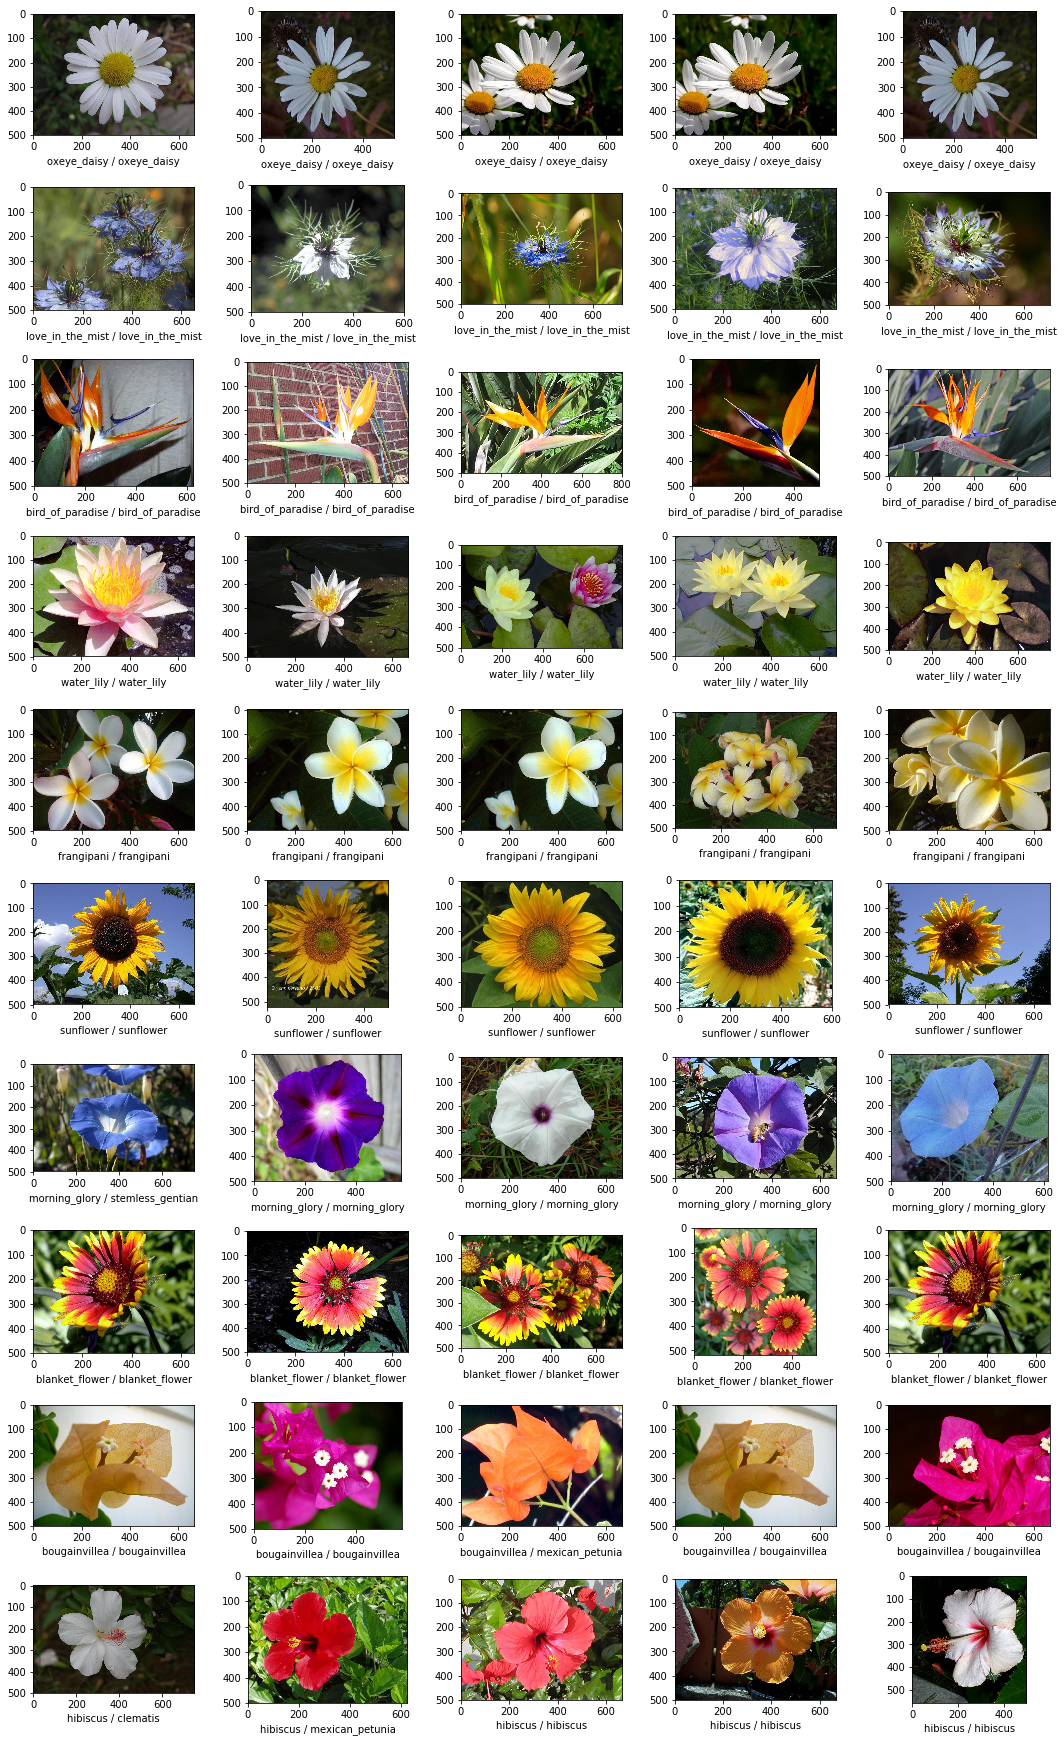

In [323]:

fig = plt.figure(figsize=(15,48))

columns=5
rows = 20

for i, image in enumerate(flat_list):
    
    image_class = math.floor(i/5)
    df2 = results['Filename'] == choice_classes[image_class] + "/" + image
    prediction = results.iloc[np.argmax(df2,axis=1)]['Predictions']
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_xlabel(choice_classes[image_class] + " / " + prediction)
    img = mpimg.imread("/data/oxford102/val/" + choice_classes[image_class] + "/" + image)
    imgplot = plt.imshow(img)

fig.tight_layout()    
plt.show()
    
    